In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.signal import butter, filtfilt, iirnotch, freqz

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ajayarunachalam/Deep_XF/master/raw_data_ecg/Sitting_data.csv', skiprows=0)

df['ecg1_standarized'] = df['ecg1'] * 100000

In [ ]:
# Función para filtro Butterworth
def butter_filter(data, cutoff, fs, btype='low', order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype=btype, analog=False)
    return filtfilt(b, a, data)

# Función para filtro notch (muesca)
def notch_filter(data, freq, fs, Q=30):
    b, a = iirnotch(freq, Q, fs)
    return filtfilt(b, a, data)

fs = 1500  # Frecuencia de muestreo en Hz
t = np.linspace(0, 5, fs*10)  # 5 segundos

ecg_raw = df['ecg1_standarized'][:15000]

# Aplicar filtros
ecg_hp = butter_filter(ecg_raw, cutoff=0.5, fs=fs, btype='high')       # Paso alto
ecg_lp = butter_filter(ecg_hp, cutoff=100, fs=fs, btype='low')         # Paso bajo
ecg_filtered = notch_filter(ecg_lp, freq=50, fs=fs, Q=30)              # Notch a 50 Hz

# Graficar resultado
plt.figure(figsize=(12, 6))
plt.plot(t, ecg_raw, label='ECG sin filtrar', color='k')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Señal ECG Original')
plt.grid()
plt.tight_layout()
plt.show()

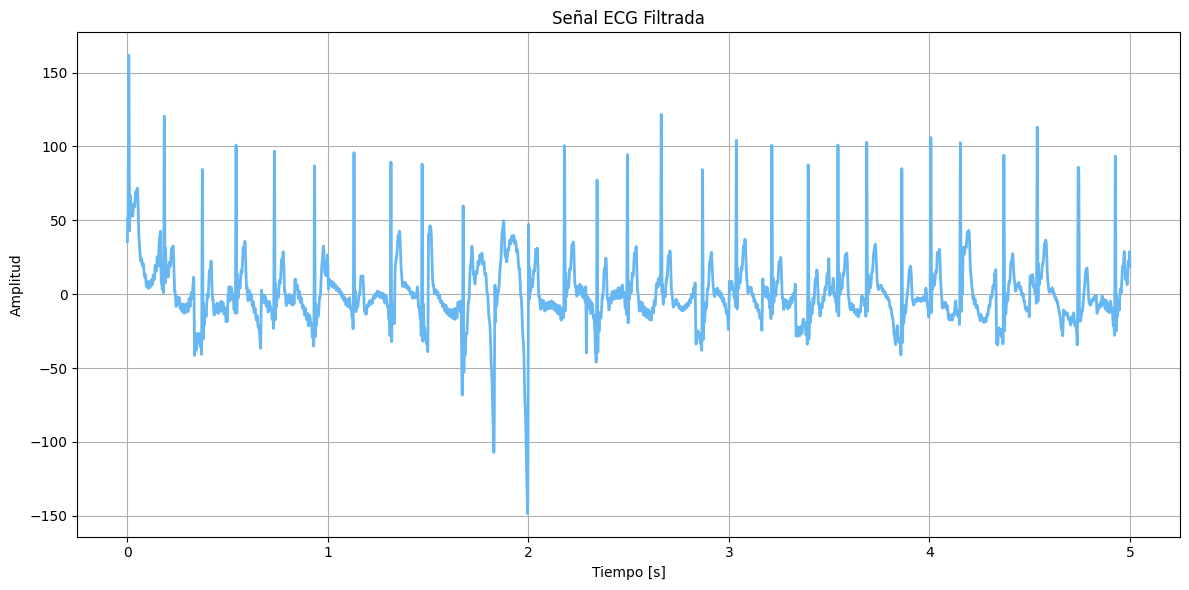

In [ ]:
# Graficar resultado
plt.figure(figsize=(12, 6))
plt.plot(t, ecg_filtered, label='ECG filtrado', linewidth=2, color='#67B7F3')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Señal ECG Filtrada')
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
archivo_emg = '1_raw_data_13-12_22.03.16.txt'
#archivo sacado de: https://archive.ics.uci.edu/dataset/481/emg+data+for+gestures

df_emg = pd.read_csv(archivo_emg, sep='\t')

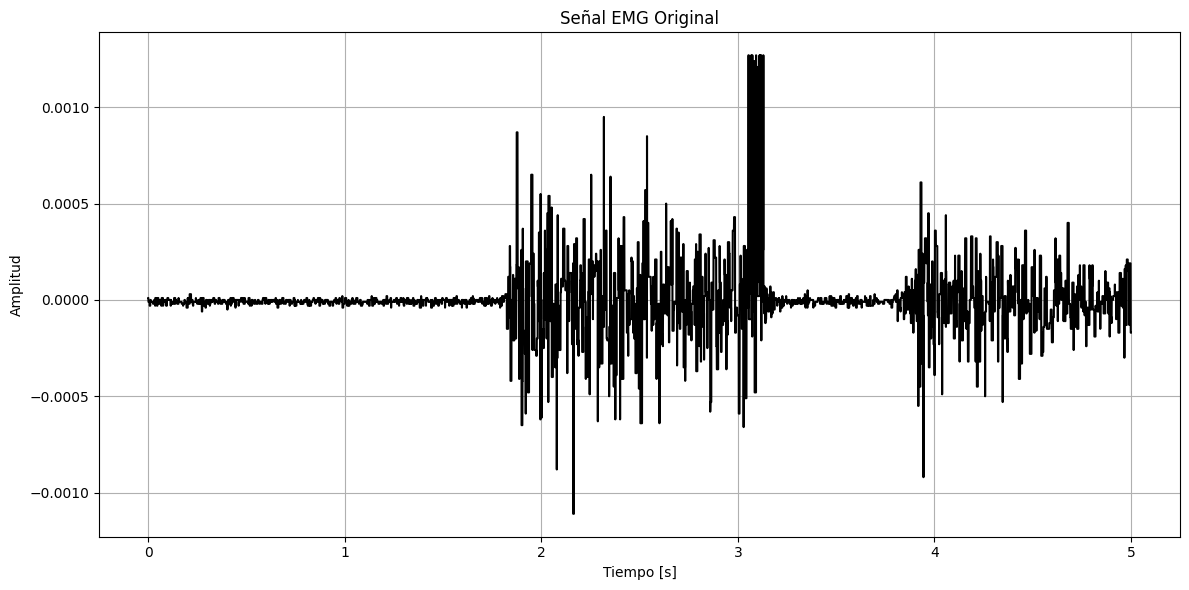

In [ ]:
# Simular una señal ECG (reemplaza esto con tus datos reales)
fs = 1500  # Frecuencia de muestreo en Hz
t = np.linspace(0, 5, fs*10)  # 10 segundos

emg_raw = df_emg['channel1'][:15000]

# Aplicar filtros
emg_hp = butter_filter(emg_raw, cutoff=20, fs=fs, btype='high')       # Paso alto
emg_lp = butter_filter(emg_hp, cutoff=500, fs=fs, btype='low')         # Paso bajo
emg_filtered = notch_filter(emg_lp, freq=50, fs=fs, Q=30)              # Notch a 50 Hz

# Graficar resultado
plt.figure(figsize=(12, 6))
plt.plot(t, emg_raw, label='EMG sin filtrar', color='k')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Señal EMG Original')
plt.grid()
plt.tight_layout()
plt.show()

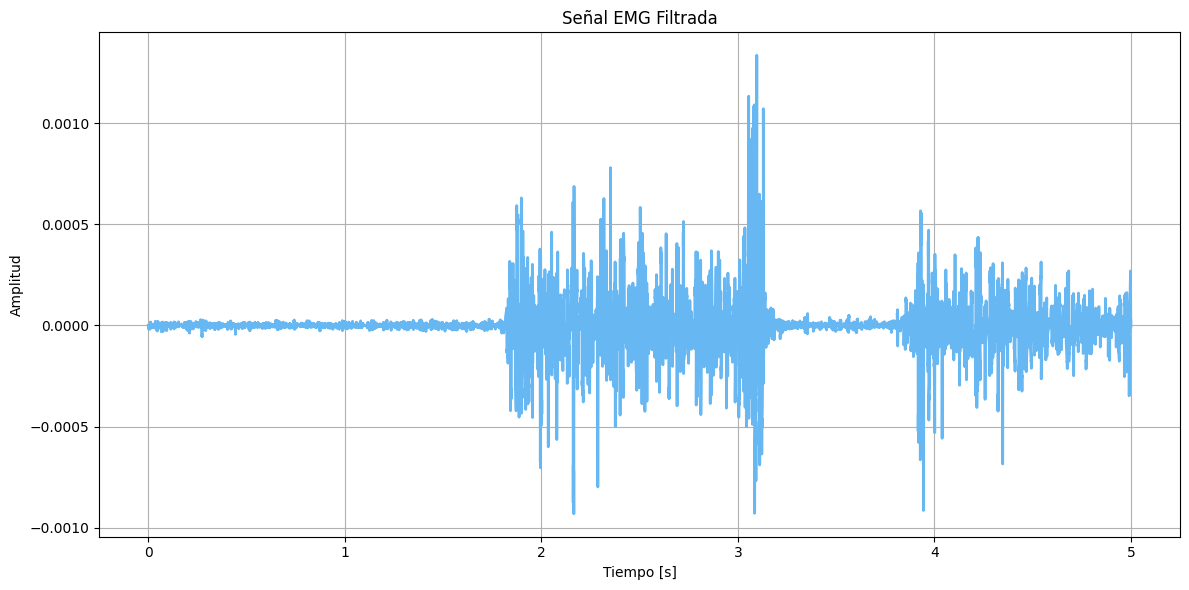

In [ ]:
# Graficar resultado
plt.figure(figsize=(12, 6))
plt.plot(t, emg_filtered, label='EMG filtrado', linewidth=2, color='#67B7F3')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Señal EMG Filtrada')
plt.grid()
plt.tight_layout()
plt.show()